1. Generate 50 2D-data points using the following function: $y = 0.4345x^3 - 5.607x^2 + 16.78x - 10.61$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def actual_distribution():
    x = np.arange(0, 9, 9/50);
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x, y

2. Add Gaussian random noise to the data. 

In [2]:
def add_noise(y_curve, sigma):
    mu = 0
    noise = np.random.normal(mu, sigma, len(y_curve))
    y_noise = y_curve + noise
    return y_noise

3. Before solving question 3, prepare the input matrix $\mathbb{X}$ and vector $\bar{t}$

In [3]:
# setup X matrix
def get_input_matrix(x_value, N, M):
    X_input = np.empty([0, N])

    # get the input X matrix
    for m in range(M):
        result_array = np.array([np.power(x, m)])
        X_input = np.append(X_input, result_array, axis = 0)
        
    X_input = np.transpose(X_input)
    return X_input

N = 50 # number of input data
M = 4 # degree of polynomial

x, y = actual_distribution() 
X_input = get_input_matrix(x, N, M)

# get the vector t
t = add_noise(y, sigma = 4.0)

3.1 $\bar{w}=(\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\bar{t}$

In [4]:
def get_w_v1(x_matrix, t):
    w = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(t)
    return w

w = get_w_v1(X_input, t) 
print(w)

[-9.70299647 16.81667589 -5.72954366  0.44901145]


3.1 $\bar{w}=\mathbb{X}^{+}\bar{t}$

In [5]:
def get_w_v2(x_matrix, t):
    w = np.linalg.pinv(x_matrix).dot(t)
    return w

w = get_w_v2(X_input, t) 
print(w)

[-9.70299647 16.81667589 -5.72954366  0.44901145]


4. Show the original curve line, the noisy data, and the curve line estimated from the noisy data

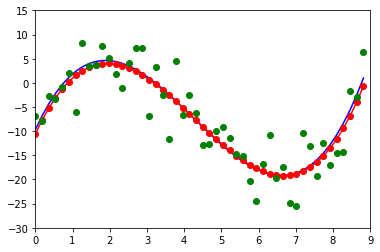

In [6]:
def get_y_estimated(w):
    p = np.poly1d(np.flip(w))
    y_estimated = p(x)
    return y_estimated

y_estimated = get_y_estimated(w)

# construct the polynomial function
def plot_ploy(x, y, y_estimated, t, w, x_begin, x_end, y_begin, y_end):
    plt.plot(x, y_estimated, color = 'b')
    plt.plot(x, y, color = 'r')
    plt.plot(x, y, 'ro')
    plt.plot(x, t, 'go')
    plt.axis([x_begin, x_end, y_begin, y_end])
    plt.show()
    
plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

5. Compute and display the error value, $E(w)$, using the function: $E(\bar{w}) = \frac{1}{2}(\bar{y} - \bar{t})^T (\bar{y} - \bar{t})$

In [7]:
def get_error_value(y_estimated, t):
    error = 1/2 * (y_estimated - t).T.dot(y_estimated - t)
    return error

error = get_error_value(y_estimated, t)
print(error)

449.5487135206442


6. Display the estimated values of $w$.

In [8]:
print(w)

[-9.70299647 16.81667589 -5.72954366  0.44901145]


7. Changing M from 1 to 10. As we can observe, the error value is quickly decreasing as M increases from 1 to 4. However, after 4, the error value does not drop a lot. 

<function matplotlib.pyplot.show(*args, **kw)>

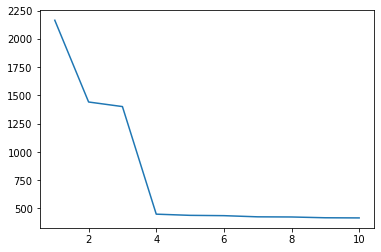

In [9]:
M_max = 10 # maximum value of M

def get_error_list(x, t, M_max):
    error_list = []
    for degree in range(1, M_max + 1):
        X_input = get_input_matrix(x, N, degree)
        w = get_w_v1(X_input, t)
        y_estimated = get_y_estimated(w)
        error = 1/2 * (y_estimated - t).T.dot(y_estimated - t)
        error_list.append(error)
        
    return error_list

error_list = get_error_list(x, t, M_max)

# plot the values of M against those of E(w)
plt.plot(range(1, M_max + 1), error_list)
plt.show

7.1 A case of underfitting (when M = 2): the error value is still very large, and the regression line does not represent the trajectory of data. 

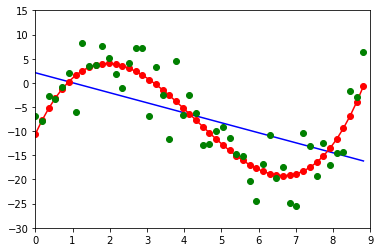

The error value when M = 2:  1441.2880680201931


In [10]:
X_input = get_input_matrix(x, N, M = 2)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

print("The error value when M = 2: ", error_list[2 - 1])

7.2 A case of overfitting (when M = 10): as we can observe from the line diagram, the regression line is maneuvering to fit the specific points.

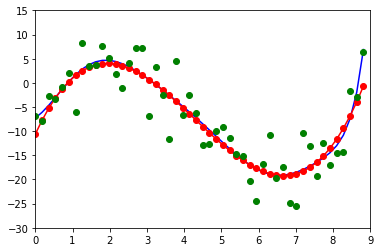

The error value when M = 10:  416.33629064951486


In [11]:
X_input = get_input_matrix(x, N, M = 10)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

print("The error value when M = 10: ", error_list[10 - 1])
    

8. Change the noise levels, and apply the the same operations above

8.1 Add less noise level and apply to the same operations

In [12]:
# get vector t with less noise level (sigma = 2)
t = add_noise(y, sigma = 2.0)

X_input = get_input_matrix(x, N, M)

8.1 $\bar{w}=(\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\bar{t}$

In [13]:
w = get_w_v1(X_input, t)
print(w)

[-9.78774788 15.73223241 -5.29130781  0.41030164]


8.1 And another version of $\bar{w}$ using pinv 

In [14]:
w = get_w_v2(X_input, t)
print(w)

[-9.78774788 15.73223241 -5.29130781  0.41030164]


8.1 Show the original curve line, the noisy data, and the curve line estimated from the noisy data

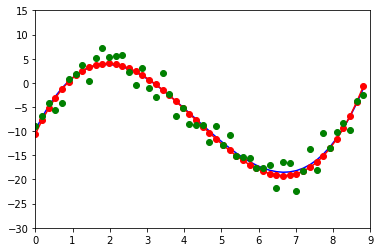

In [15]:
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

8.1 Changing M from 1 to 10. As we can observe, the error value is quickly decreasing as M increases from 1 to 4. However, after 4, the error value does not drop a lot.

<function matplotlib.pyplot.show(*args, **kw)>

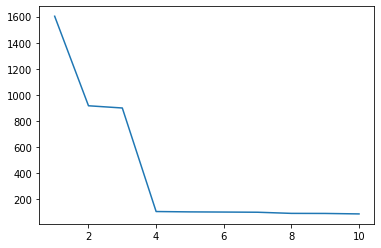

In [16]:
M_max = 10 

error_list = get_error_list(x, t, M_max)

# plot the values of M against those of E(w)
plt.plot(range(1, M_max + 1), error_list)
plt.show

8.1 A case of underfitting (when M = 2): the error value is still very large, and the regression line does not represent the trajectory of data. 

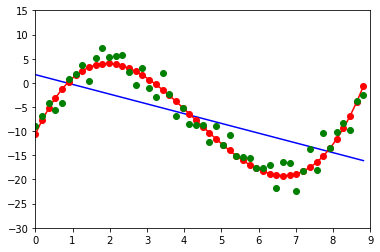

The error value when M = 2:  916.2679818982509


In [17]:
X_input = get_input_matrix(x, N, M = 2)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

print("The error value when M = 2: ", error_list[2 - 1])

8.1 A case of overfitting (when M = 10): as we can observe from the line diagram, the regression line is maneuvering to fit the specific points.

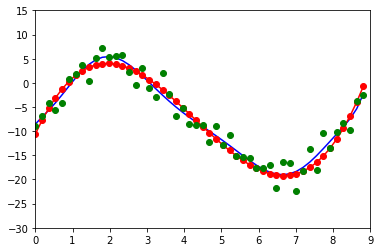

The error value when M = 10:  86.56637364255529


In [18]:
X_input = get_input_matrix(x, N, M = 10)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

print("The error value when M = 10: ", error_list[10 - 1])

8.2 Add more noise level, and apply to the same operations

In [19]:
# get vector t with more noise level (sigma = 6)
t = add_noise(y, sigma = 6.0)

X_input = get_input_matrix(x, N, M)

8.2 $\bar{w}=(\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\bar{t}$

In [20]:
w = get_w_v1(X_input, t)
print(w)

[-3.11221224 10.26492059 -3.91056118  0.3128185 ]


8.2 And another version of $\bar{w}$ using pinv 

In [21]:
w = get_w_v2(X_input, t)
print(w)

[-3.11221224 10.26492059 -3.91056118  0.3128185 ]


8.2 Show the original curve line, the noisy data, and the curve line estimated from the noisy data

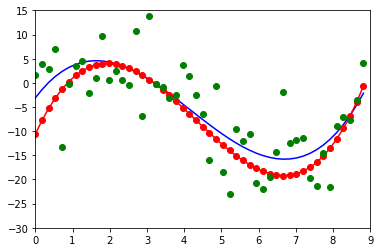

In [22]:
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

8.2 Changing M from 1 to 10. As we can observe, the error value is quickly decreasing as M increases from 1 to 4. However, after 4, the error value does not drop a lot.

<function matplotlib.pyplot.show(*args, **kw)>

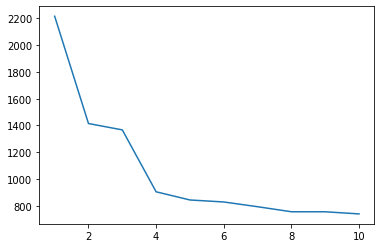

In [23]:
M_max = 10 

error_list = get_error_list(x, t, M_max)

# plot the values of M against those of E(w)
plt.plot(range(1, M_max + 1), error_list)
plt.show

8.2 A case of underfitting (when M = 2): the error value is still very large, and the regression line does not represent the trajectory of data.  

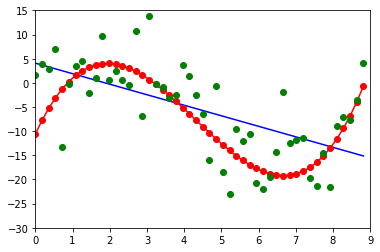

The error value when M = 2:  1414.6037750728294


In [24]:
X_input = get_input_matrix(x, N, M = 2)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

print("The error value when M = 2: ", error_list[2 - 1])

8.2 A case of overfitting (when M = 10): as we can observe from the line diagram, the regression line is maneuvering to fit the specific points.

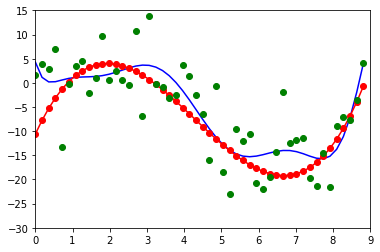

The error value when M = 10:  740.6636964809727


In [25]:
X_input = get_input_matrix(x, N, M = 10)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 9, -30, 15)

print("The error value when M = 10: ", error_list[10 - 1])

9. Change the function for generating the data to $y=sin(x^2 + 1)$, and apply to the same operations

In [26]:
def actual_distribution_new():
    x = np.arange(0, 1, 1/50);
    y = np.sin(np.power(x,2) + 1);
    return x, y

x, y = actual_distribution_new() 
X_input = get_input_matrix(x, N, M)

# get the vector t
t = add_noise(y, sigma = 0.05)

9. $\bar{w}=(\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\bar{t}$

In [27]:
w = get_w_v1(X_input, t)
print(w)

[ 0.85118899 -0.26982967  1.56708952 -1.26457506]


9. And another version of $\bar{w}$ using pinv 

In [28]:
w = get_w_v2(X_input, t)
print(w)

[ 0.85118899 -0.26982967  1.56708952 -1.26457506]


9. Show the original curve line, the noisy data, and the curve line estimated from the noisy data

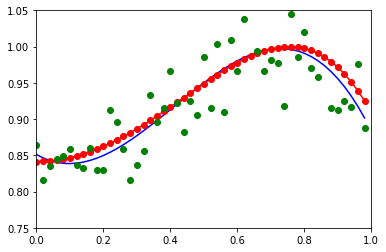

In [29]:
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

9. Changing M from 1 to 10. 

<function matplotlib.pyplot.show(*args, **kw)>

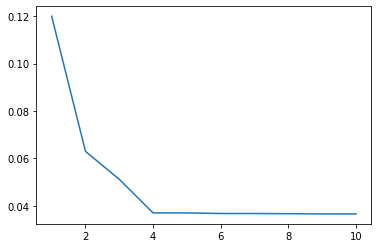

In [30]:
M_max = 10 

error_list = get_error_list(x, t, M_max)

# plot the values of M against those of E(w)
plt.plot(range(1, M_max + 1), error_list)
plt.show

9. A case of underfitting (when M = 2): the error value is still very large, and the regression line does not represent the trajectory of data. 

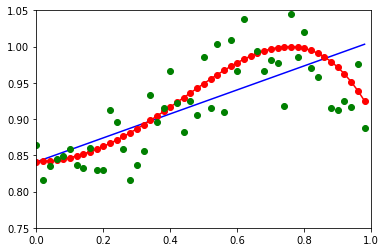

The error value when M = 2:  0.06293718906582382


In [31]:
X_input = get_input_matrix(x, N, M = 2)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

print("The error value when M = 2: ", error_list[2 - 1])

9. A case of overfitting (when M = 10): As we can observe from the line diagram, the regression line is maneuvering to fit the specific points.

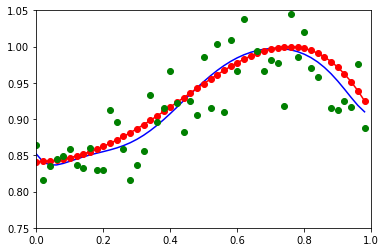

The error value when M = 10:  0.03651904800154762


In [32]:
X_input = get_input_matrix(x, N, M = 10)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

print("The error value when M = 10: ", error_list[10 - 1])

9.1 add the noise level to the current function

In [33]:
def actual_distribution_new():
    x = np.arange(0, 1, 1/50);
    y = np.sin(np.power(x,2) + 1);
    return x, y

x, y = actual_distribution_new() 
X_input = get_input_matrix(x, N, M)

# get the vector t, add noise level
t = add_noise(y, sigma = 0.05 + 0.02)

9.1 $\bar{w}=(\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\bar{t}$

In [34]:
w = get_w_v1(X_input, t)
print(w)

[ 0.8158784   0.01476874  1.18660699 -1.14500547]


9.1 And another version of $\bar{w}$ using pinv 

In [35]:
w = get_w_v2(X_input, t)
print(w)

[ 0.8158784   0.01476874  1.18660699 -1.14500547]


9.1 Show the original curve line, the noisy data, and the curve line estimated from the noisy data

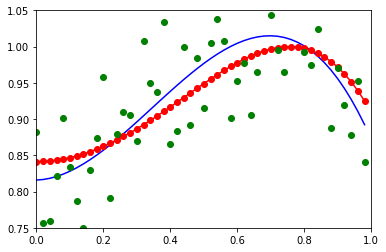

In [36]:
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

9.1 Changing M from 1 to 10. 

<function matplotlib.pyplot.show(*args, **kw)>

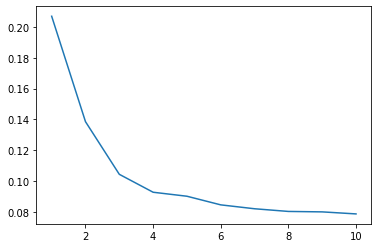

In [37]:
M_max = 10 

error_list = get_error_list(x, t, M_max)

# plot the values of M against those of E(w)
plt.plot(range(1, M_max + 1), error_list)
plt.show

9.1 A case of underfitting (when M = 2): the error value is still very large, and the regression line does not represent the trajectory of data. 

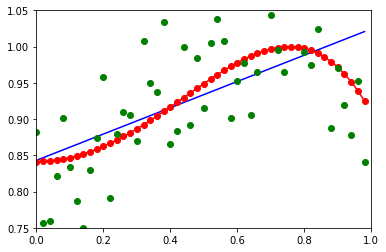

The error value when M = 2:  0.13848342821524917


In [38]:
X_input = get_input_matrix(x, N, M = 2)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

print("The error value when M = 2: ", error_list[2 - 1])

9.1 A case of overfitting (when M = 10): As we can observe from the line diagram, the regression line is maneuvering to fit the specific points.

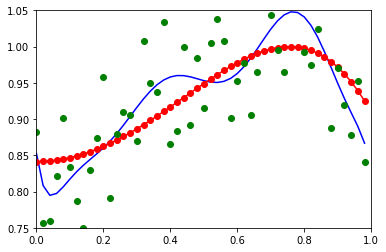

The error value when M = 10:  0.07859173649577958


In [39]:
X_input = get_input_matrix(x, N, M = 10)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

print("The error value when M = 10: ", error_list[10 - 1])

9.2 reduce the noise level, and apply to the same operations

In [40]:
def actual_distribution_new():
    x = np.arange(0, 1, 1/50);
    y = np.sin(np.power(x,2) + 1);
    return x, y

x, y = actual_distribution_new() 
X_input = get_input_matrix(x, N, M)

# get the vector t, and reduce the noise level
t = add_noise(y, sigma = 0.05 - 0.02)

9.2 $\bar{w}=(\mathbb{X}^T\mathbb{X})^{-1}\mathbb{X}^T\bar{t}$

In [41]:
w = get_w_v1(X_input, t)
print(w)

[ 0.84664726 -0.14843418  1.09565288 -0.86581338]


9.2 And another version of $\bar{w}$ using pinv 

In [42]:
w = get_w_v2(X_input, t)
print(w)

[ 0.84664726 -0.14843418  1.09565288 -0.86581338]


9.2 Show the original curve line, the noisy data, and the curve line estimated from the noisy data

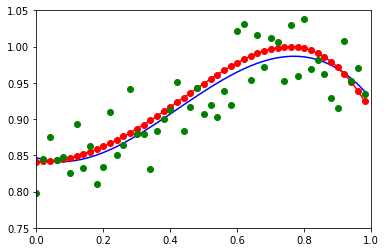

In [43]:
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

9.2 Changing M from 1 to 10. 

<function matplotlib.pyplot.show(*args, **kw)>

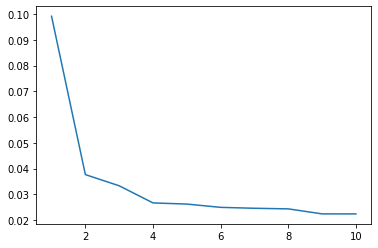

In [44]:
M_max = 10 

error_list = get_error_list(x, t, M_max)

# plot the values of M against those of E(w)
plt.plot(range(1, M_max + 1), error_list)
plt.show

9.2 A case of underfitting (when M = 2): the error value is still very large, and the regression line does not represent the trajectory of data. 

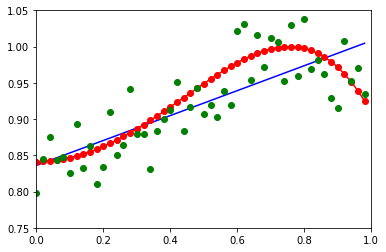

The error value when M = 2:  0.037648653336500554


In [45]:
X_input = get_input_matrix(x, N, M = 2)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

print("The error value when M = 2: ", error_list[2 - 1])

9.2 A case of overfitting (when M = 10): As we can observe from the line diagram, the regression line is maneuvering to fit the specific points.

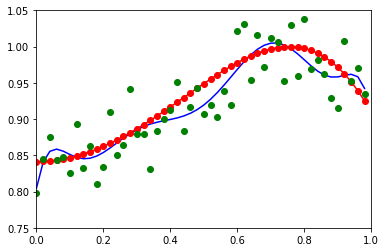

The error value when M = 10:  0.022367129800919355


In [46]:
X_input = get_input_matrix(x, N, M = 10)

w = get_w_v1(X_input, t)
y_estimated = get_y_estimated(w)

plot_ploy(x, y, y_estimated, t, w, 0, 1, 0.75, 1.05)

print("The error value when M = 10: ", error_list[10 - 1])